In [3]:
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import geopandas
import matplotlib.pyplot as plt
from descartes import PolygonPatch
impo
%matplotlib inline

In [4]:
towers_csv = Path("cellular_towers.csv")
towers_df = pd.read_csv(towers_csv)
towers_df.dropna(inplace=True)
towers_df.head()

,X,Y,FID,LICENSEE,CALLSIGN,LOCNUM,LAT_DMS,LATDIR,LON_DMS,LONDIR,...,LOCCITY,LOCCOUNTY,LOCSTATE,NEPA,QZONE,TOWREG,SUPSTRUC,ALLSTRUC,STRUCTYPE,LIC_ID
54,-7396534.329,2043179.660,55,"AT&T MOBILITY PUERTO RICO, INC.",KNKA467,2,"18,2,53",N,"66,26,39",W,...,NOT AVAILABLE,JUANA DIAZ,PR,N,11/30/2009,1011218.0,86.9,91.7,MAST,11514
55,-7412953.960,2057714.460,56,"AT&T MOBILITY PUERTO RICO, INC.",KNKA467,6,"18,10,20",N,"66,35,30",W,...,JAYUYA,JAYUYA,PR,N,11/30/2009,1017057.0,61.0,68.6,MAST,11514
56,-7420401.236,2050978.683,57,"AT&T MOBILITY PUERTO RICO, INC.",KNKA467,7,"18,6,53",N,"66,39,31",W,...,PONCE,PONCE,PR,N,11/30/2009,1236245.0,55.7,58.5,MAST,11514
58,-7466665.631,2091990.123,59,"AT&T MOBILITY PUERTO RICO, INC.",KNKA627,2,"18,27,52",N,"67,4,27",W,...,AGUADILLA,AGUADILLA,PR,N,12/7/2010,1011221.0,87.5,92.7,MAST,11515
59,-7474736.297,2089279.260,60,"AT&T MOBILITY PUERTO RICO, INC.",KNKA627,3,"18,26,29",N,"67,8,48",W,...,AGUADILLA,AGUADILLA,PR,N,8/23/2010,1011204.0,85.0,89.3,MAST,11515


In [5]:
towers_df["LAT_DMS"] = towers_df["LAT_DMS"].str.replace(',', ' ')
towers_df["LON_DMS"] = towers_df["LON_DMS"].str.replace(',', ' ')
lat = towers_df['LAT_DMS'].str.split(" ", n=2,expand=True)
towers_df["lat_d"] = lat[0]
towers_df["lat_m"] = lat[1]
towers_df["lat_s"] = lat[2]
lon = towers_df['LON_DMS'].str.split(" ", n=2,expand=True)
towers_df["lon_d"] = lon[0]
towers_df["lon_m"] = lon[1]
towers_df["lon_s"] = lon[2]
towers_df.drop(columns=["LAT_DMS", "LON_DMS"], inplace=True)

In [6]:
towers_df["lat_d"] = towers_df["lat_d"].astype('float64')
towers_df["lat_m"] = towers_df["lat_m"].astype('float64')
towers_df["lat_s"] = towers_df["lat_s"].astype('float64')
towers_df["lon_d"] = towers_df["lon_d"].astype('float64')
towers_df["lon_m"] = towers_df["lon_m"].astype('float64')
towers_df["lon_s"] = towers_df["lon_s"].astype('float64')

In [17]:
latd = towers_df["lat_d"]
latm = towers_df["lat_m"]
lats = towers_df["lat_s"]
lond = towers_df["lon_d"]
lonm = towers_df["lon_m"]
lons = towers_df["lon_s"]

for column in towers_df:
    towers_df['latitude'] = latd + (latm/60) + (lats/3600)
    towers_df['longitude'] = -1*(lond + (lonm/60) + (lons/3600))
    
towers_df.head()

,X,Y,FID,LICENSEE,CALLSIGN,LOCNUM,LATDIR,LONDIR,LOCADD,LOCCITY,...,LIC_ID,lat_d,lat_m,lat_s,lon_d,lon_m,lon_s,latitude,longitude,geometry
54,-7396534.329,2043179.660,55,"AT&T MOBILITY PUERTO RICO, INC.",KNKA467,2,N,W,"ROAD # 14, KM 20 HM 7 RIO CANAS WARD",NOT AVAILABLE,...,11514,18.0,2.0,53.0,66.0,26.0,39.0,18.048056,-66.444167,POINT (18.04806 66.44417)
55,-7412953.960,2057714.460,56,"AT&T MOBILITY PUERTO RICO, INC.",KNKA467,6,N,W,"PANORAMIC ROAD # 143 KM. 18, VEGUITA WARD",JAYUYA,...,11514,18.0,10.0,20.0,66.0,35.0,30.0,18.172222,-66.591667,POINT (18.17222 66.59167)
56,-7420401.236,2050978.683,57,"AT&T MOBILITY PUERTO RICO, INC.",KNKA467,7,N,W,ROAD 123 KM 2 GUARAGUAO WARD,PONCE,...,11514,18.0,6.0,53.0,66.0,39.0,31.0,18.114722,-66.658611,POINT (18.11472 66.65861)
58,-7466665.631,2091990.123,59,"AT&T MOBILITY PUERTO RICO, INC.",KNKA627,2,N,W,ROAD 466 KM 0.7 CEIBA BAJA WARD,AGUADILLA,...,11515,18.0,27.0,52.0,67.0,4.0,27.0,18.464444,-67.074167,POINT (18.46444 67.07417)
59,-7474736.297,2089279.260,60,"AT&T MOBILITY PUERTO RICO, INC.",KNKA627,3,N,W,RADIO NOROESTE BROADCASTING INTER SUR #2 AND #459,AGUADILLA,...,11515,18.0,26.0,29.0,67.0,8.0,48.0,18.441389,-67.146667,POINT (18.44139 67.14667)


In [21]:
towers_gdf = geopandas.GeoDataFrame(
    towers_df, geometry = geopandas.points_from_xy(towers_df.X, towers_df.Y)
)

In [22]:
print(towers_gdf.head())

              X            Y  FID                         LICENSEE CALLSIGN  \
54 -7396534.329  2043179.660   55  AT&T MOBILITY PUERTO RICO, INC.  KNKA467   
55 -7412953.960  2057714.460   56  AT&T MOBILITY PUERTO RICO, INC.  KNKA467   
56 -7420401.236  2050978.683   57  AT&T MOBILITY PUERTO RICO, INC.  KNKA467   
58 -7466665.631  2091990.123   59  AT&T MOBILITY PUERTO RICO, INC.  KNKA627   
59 -7474736.297  2089279.260   60  AT&T MOBILITY PUERTO RICO, INC.  KNKA627   

    LOCNUM LATDIR LONDIR                                             LOCADD  \
54       2      N      W               ROAD # 14, KM 20 HM 7 RIO CANAS WARD   
55       6      N      W          PANORAMIC ROAD # 143 KM. 18, VEGUITA WARD   
56       7      N      W                       ROAD 123 KM 2 GUARAGUAO WARD   
58       2      N      W                    ROAD 466 KM 0.7 CEIBA BAJA WARD   
59       3      N      W  RADIO NOROESTE BROADCASTING INTER SUR #2 AND #459   

          LOCCITY  ... LIC_ID lat_d lat_m lat_s  l

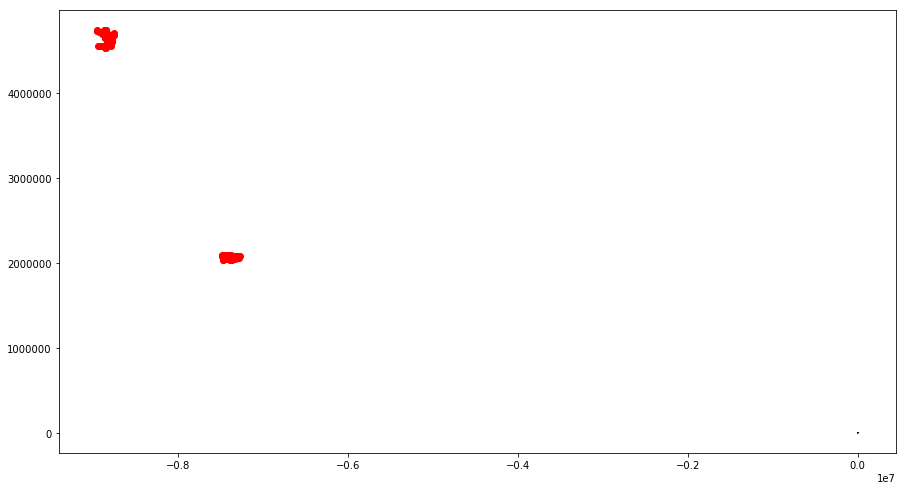

In [23]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    figsize=(15,10), color = 'white', edgecolor = 'black'
)

towers_gdf.plot(ax=ax, color = 'red')

plt.show()